In [1]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [2]:
from sklearn.model_selection import train_test_split

In [4]:
# 75% 훈련 데이터 25% 시험 데이터
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight)

In [5]:
# 2차원 넘파이 배열
train_input = train_input.reshape(-1,1)
test_input = train_input.reshape(-1,1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [9]:
knr.predict([[50]])

array([987.])

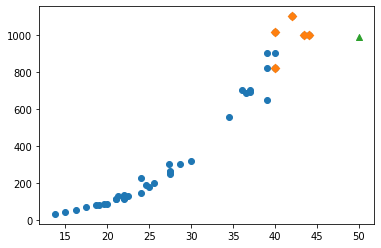

In [13]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker = 'D')
plt.scatter(50,987,marker='^')

plt.show()


In [14]:
# 길이 50 일때 가장 가까운 무게 5개를 잡고 무게 평균이 987

knr.predict([[500]]) # 길이가 500일때도 987로 예측

array([987.])

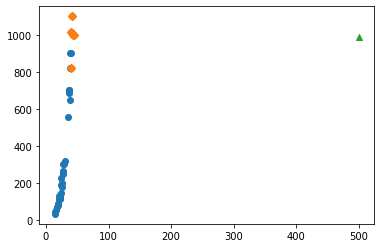

In [15]:
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker = 'D')
plt.scatter(500,987,marker='^')

plt.show()


In [16]:
# 가지고 있는 데이터가 저것 뿐이라 그나마 가까운 데이터를 예측한 것임

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [18]:
lr.predict([[50]])

array([1202.2421867])

In [19]:
# 선형 회귀는 선을 그려 직선의 방정식 ,기울기 존재 ,절편 존재
lr.coef_ # 기울기

array([37.50450815])

In [20]:
lr.intercept_ # y 절편

-672.9832207672112

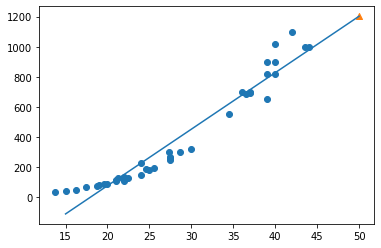

In [23]:
plt.scatter(train_input,train_target)
# 농어의 길이는 15~50
plt.plot ([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1202,marker='^')

plt.show()

In [25]:
# 선을 기반으로 50 ->1202
# 곡선의 느낌인데 어떻게 그릴 것인가?
# 길이 데이터 하나 가지고 곡선 x 데이터 부족함 곡선 표현 힘듬 -> 강제로 데이터 늘려주기
# 2차방정식이 되려면 다른 데이터 요인이 필요
# 길이의 제곱 데이터를 추가

# 2차원 배열
train_poly = np.column_stack([train_input **2,train_input])
test_poly = np.column_stack([test_input **2,test_input])

In [26]:
train_poly

array([[ 400.  ,   20.  ],
       [ 655.36,   25.6 ],
       [ 756.25,   27.5 ],
       [ 225.  ,   15.  ],
       [ 625.  ,   25.  ],
       [ 441.  ,   21.  ],
       [ 262.44,   16.2 ],
       [ 756.25,   27.5 ],
       [ 349.69,   18.7 ],
       [1369.  ,   37.  ],
       [ 453.69,   21.3 ],
       [ 605.16,   24.6 ],
       [1600.  ,   40.  ],
       [ 384.16,   19.6 ],
       [ 756.25,   27.5 ],
       [ 576.  ,   24.  ],
       [ 900.  ,   30.  ],
       [ 187.69,   13.7 ],
       [1892.25,   43.5 ],
       [1521.  ,   39.  ],
       [1332.25,   36.5 ],
       [1190.25,   34.5 ],
       [1764.  ,   42.  ],
       [ 506.25,   22.5 ],
       [1369.  ,   37.  ],
       [ 441.  ,   21.  ],
       [1521.  ,   39.  ],
       [1600.  ,   40.  ],
       [ 484.  ,   22.  ],
       [ 361.  ,   19.  ],
       [ 484.  ,   22.  ],
       [1600.  ,   40.  ],
       [ 745.29,   27.3 ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 576.  ,   24.  ],
       [ 484.  ,   22.  ],
 

In [27]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [29]:
lr.predict([[50**2,50]])

array([1569.84639195])

In [30]:
lr.coef_

array([  1.07723822, -26.10766603])

In [31]:
lr.intercept_

182.13414525291017

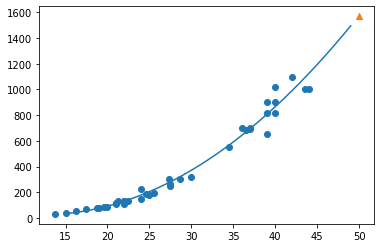

In [33]:
point = np.arange(15,50)

plt.scatter(train_input, train_target)
plt.plot(point,1.077*point **2 - 26*point +182)
plt.scatter(50,1569,marker='^')
plt.show()


In [ ]:
# 요인이 하나 늘어나 곡선으로 데이터를 더 잘 표현함.